In [14]:
import numpy as np
# import streamlit as st
# import re
# import requests
# import base64
# from bs4 import BeautifulSoup
import datetime

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

import math 


# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
def fetch_data (start_date , end_date, tickers): 
    data = yf.download(tickers=tickers, start= start_date , end=end_date , interval = '1d')   
    return data

def get_pch(df):
    mean = df[op].mean()
    base_price = df.iloc[0][0]
    pch_list = []
    # pch_list.append(0)
    print("mean is " , mean)
    for i in range(len(df)):
        a= (df.iloc[i][0] - base_price)  / mean
        
        pch_list.append(a*100)
    # for i in range(1,len(df)):
    #     a= df.iloc[i][0]  / base_price
    #     if a > 1 :
    #         a= a -1 
    #     else:
    #         a = -(1 - a)
    #     pch_list.append(a*100)
    
    df = pd.DataFrame(pch_list)
    
    return df


In [16]:
import datetime
df = fetch_data(datetime.date(2020,1,1), datetime.date(2022,4,1),tickers="BTC-USD")


op = 'Close'
days= 10
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275


In [17]:
df.shape

(822, 6)

In [30]:
int(len(df) - len(df)*0.1)

739

In [31]:
#  train test 

train_sample = int(len(df) - len(df)*0.1)

train_data = list(df[train_sample:][op])

# test_data = list(df[train_sample:][op])
# train_data = list(df[0:train_sample][op])

# test_data = list(df[train_sample:][op])



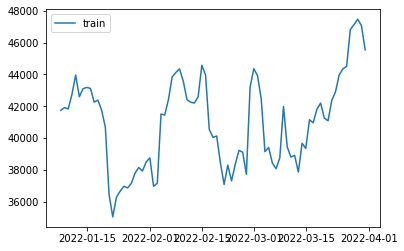

In [33]:
plt.plot(df.index[train_sample:],train_data , label = 'train_data')
# plt.plot(df.index[train_sample:],test_data , label = 'test')
plt.legend()

In [34]:
pred = []

# test_obervations = len(test_data)

# test_obervations

In [35]:
for i in range(10):
    model = ARIMA(train_data, order=(4,1,0))
    model_fir = model.fit()
    output = model_fir.forecast()
    
    pred.append(output[0][0])
    
    
    # error = abs(y_actual - output[0][0])
    
    # print("output is ", output[0][0])
    
    train_data.append(output[0][0])


In [36]:
model_fir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   91
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -784.723
Method:                       css-mle   S.D. of innovations           1344.877
Date:                Thu, 14 Apr 2022   AIC                           1581.445
Time:                        09:52:53   BIC                           1596.511
Sample:                             1   HQIC                          1587.523
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7384    132.140      0.354      0.724    -212.251     305.727
ar.L1.D.y      0.0820      0.104      0.789      0.430      -0.122       0.286
ar.L2.D.y     -0.1084      0.104     -1.045      0.296      -0.312       0.095
ar.L3.D.y      0.0451      0.103      0.437      0.662      -0.157       0.247
ar.L4.D.y     -0.0897      0.103     -0.874      0.382      -0.291       0.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0513           -1.4403j            1.7831           -0.3503
AR.2           -1.0513           +1.4403j            1.7831            0.3503
AR.3            1.3024           -1.3447j            1.8721           -0.1275
AR.4            1.3024           +1.3447j            1.8721            0.1275
-----------------------------------------------------------------------------
"""

In [52]:
from datetime import datetime, timedelta

sdate = df.index[len(df)-1]  # start date
edate = sdate +  timedelta(days=10)   # end date

# datetime.date
pred_date_range = pd.date_range(sdate,edate-timedelta(days=1),freq='d')

# sdate , edate

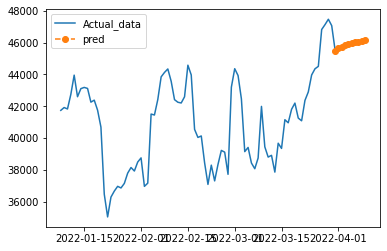

In [53]:
plt.plot(df.index[train_sample:],train_data[:len(df) - train_sample] , label = 'Actual_data')
plt.plot(pred_date_range, pred , label = 'pred' , marker = 'o' , linestyle = 'dashed')
plt.legend()

In [29]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
2022-03-28,46821.851562,48086.835938,46690.203125,47128.003906,47128.003906,36362175703
2022-03-29,47100.437500,48022.289062,47100.437500,47465.730469,47465.730469,31397059069
2022-03-30,47456.898438,47655.148438,46746.210938,47062.664062,47062.664062,29333883962
2022-03-31,47062.148438,47512.027344,45390.539062,45538.675781,45538.675781,33327427106
